In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import os

#os.chdir(r"C:\Users\raned\Documents\GitHub\PostModeration")


This notebook will start off with preprocessing the two csv files to train different supervised learning models. 
- Removal of usernames, URLs, and special characters
- Lowercasing text
- Tokenization (nltk or spaCy): breaking text into smaller units 
- Stopword removal: remove common words that become index terms ("and", "or", "the", "in")
- Lemmatization: reduces words to their base or dictionary form
- TF-IDF vectorization for feature extraction: a technique that converts text data into numerical vectors, representing the importance of words in a document relative to a collection of documents, by combining term frequency with inverse document frequency

In [271]:
df1 = pd.read_csv("TrainingData/labeled_data.csv")

print("=== df1: Dataset1 ===")
print(df1.describe())
print(df1.shape)
print(df1.head())
print(df1.info())
print(df1.columns)


=== df1: Dataset1 ===
         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  
(24783, 7)
   

**count**: number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were

**hate_speech**: number of CF users who judged the tweet to be hate speech

**offensive_language**: number of CF users who judged the tweet to be offensive

**neither**: number of CF users who judged the tweet to be neither offensive nor non-offensive

**class**: class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither


In [272]:
# scrubbing text: removing usernames, URLs, special characters and ensuring all text is lowercase
tweet_column = df1['tweet'].astype(str).str.casefold()  # lowercase
tweet_column.head()


0    !!! rt @mayasolovely: as a woman you shouldn't...
1    !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3    !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4    !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
Name: tweet, dtype: object

In [274]:
#removes usernames first, urls, then any special characters
clean_tweet = tweet_column.str.replace(r'(rt)?\s?@\w+:?', ' ', regex=True).str.replace(r'http.+', ' ', regex=True).str.replace(r'\W+', ' ', regex=True)
clean_tweet.head()

0     as a woman you shouldn t complain about clean...
1     boy dats cold tyga dwn bad for cuffin dat hoe...
2     dawg you ever fuck a bitch and she start to c...
3                               she look like a tranny
4     the shit you hear about me might be true or i...
Name: tweet, dtype: object

In [275]:
#tokenization, stop words, and lemmatization
from nltk.corpus import stopwords

nltk.download('punkt_tab')
#nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) #stopwords

def clean_tokenize(text): 
    tokens = word_tokenize(text)  # Keeps contractions like "don't"; tokenization
    tokens = [t.lower() for t in tokens if t.isalpha() or "'" in t]  # keep letters + contractions
    tokens = [t for t in tokens if t != "rt" and t not in stop_words]  # remove 'rt' and stopwords
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens] #lemmatization
    return lemmatized

cleaned_tokens = clean_tweet.apply(clean_tokenize)
print(cleaned_tokens.head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/abigailcalderon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abigailcalderon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abigailcalderon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abigailcalderon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [woman, complain, cleaning, house, amp, man, a...
1    [boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...
2    [dawg, ever, fuck, bitch, start, cry, confused...
3                                 [look, like, tranny]
4    [shit, hear, might, true, might, faker, bitch,...
Name: tweet, dtype: object


In [276]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

df['cleaned_text'] = cleaned_tokens.apply(lambda tokens: ' '.join(tokens))


tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

feature_names = tfidf.get_feature_names_out()
print(feature_names[:100])  
print(df)

['aa' 'aaaaaaaaand' 'aaahhhhh' 'aahahah' 'aaliyah' 'aan' 'aap' 'aaron'
 'aaronmacgruder' 'aaryn' 'ab' 'abandonado' 'abbey' 'abby' 'abc' 'abdelka'
 'abduction' 'abdullah' 'abdurahman' 'abed' 'abel' 'aberdeen' 'ability'
 'able' 'abo' 'aborted' 'abortion' 'abou' 'abound' 'abouta' 'abouttime'
 'abraham' 'absent' 'absolute' 'absolutely' 'absoluteyvile' 'absolved'
 'abstract' 'absurd' 'abt' 'abu' 'abundance' 'abus' 'abuse' 'abused'
 'abuser' 'abusive' 'ac' 'aca' 'acab' 'academic' 'accelerated' 'accent'
 'accept' 'acceptable' 'acceptance' 'accepted' 'access' 'accessible'
 'accessorize' 'accessory' 'accident' 'accidentally' 'accipiter'
 'accipitridae' 'accnt' 'accolade' 'accompanied' 'accord' 'according'
 'accordingly' 'account' 'accountable' 'accountant' 'acct' 'accuracy'
 'accurate' 'accurately' 'accused' 'accuses' 'accustomed' 'acdc' 'ace'
 'aceptar' 'aceves' 'ach' 'achieve' 'achilles' 'aching' 'acid' 'ackin'
 'acknowledge' 'acknowledged' 'acknowledging' 'acl' 'acne' 'acoustic'
 'acquire' '

In [277]:
#PREPROCESSING FOR HateSpeechDatasetBalanced.csv

#Load dataset and take a 27,000-row sample; easier to have random 27,000 samples due to how big the actual dataset is 
df = pd.read_csv("TrainingData/HateSpeechDatasetBalanced.csv")
df_subset = df.sample(n=27000, random_state=42).copy()

df_subset['Content'] = df_subset['Content'].astype(str).str.casefold()

def clean_tokenize(text):
    tokens = word_tokenize(text)  # splits into words and keeps contractions
    tokens = [t for t in tokens if t.isalpha()]  # keep only alphabetic tokens
    tokens = [t for t in tokens if t not in stop_words]
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]
    return lemmatized


df_subset['cleaned_tokens'] = df_subset['Content'].apply(clean_tokenize)
df_subset['cleaned_text'] = df_subset['cleaned_tokens'].apply(lambda x: ' '.join(x))


df_subset['cleaned_text'] = df_subset['cleaned_text'].fillna('')


tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df_subset['cleaned_text'])  # Features
y = df_subset['Label']  # Target labels

print("TF-IDF shape:", X_tfidf.shape)
print(tfidf.get_feature_names_out()[:100])

TF-IDF shape: (27000, 33004)
['aa' 'aaa' 'aaaa' 'aaaaa' 'aaaaaaaaaaaaaaaaa' 'aaaaaaacopyrighta'
 'aaaaaaareaareaaaaaaaaaaaaaa' 'aaaaarrrrrggggghhhhh' 'aaaacg'
 'aaadonaaat' 'aaah' 'aaand' 'aachen' 'aaeyou' 'aag' 'aah' 'aaib' 'aaj'
 'aak' 'aalukkoru' 'aand' 'aanti' 'aap' 'aardvark' 'aaron' 'aaroncrick'
 'aarp' 'aau' 'ab' 'aba' 'aback' 'abacus' 'abandon' 'abandoned' 'abash'
 'abated' 'abaxial' 'abb' 'abba' 'abbey' 'abbott' 'abbreviated'
 'abbreviation' 'abc' 'abd' 'abdf' 'abdomen' 'abduce' 'abdul' 'abdullah'
 'abe' 'abecedary' 'abeh' 'abel' 'abelson' 'aberdeen' 'abet' 'abeyance'
 'abf' 'abhishek' 'abhorrent' 'abidance' 'abide' 'abiding' 'abigail'
 'ability' 'abiogenic' 'abject' 'abk' 'abkhazia' 'able' 'abm' 'abnegation'
 'abner' 'abnormal' 'abnormality' 'aboard' 'abode' 'abolish' 'abolished'
 'abolishment' 'abolitionist' 'abominable' 'abominably' 'abominate'
 'abomination' 'aboridzinima' 'aboriginal' 'aborigine' 'abort' 'aborted'
 'abortion' 'abortive' 'abortively' 'abound' 'abp' 'abraha

In [14]:
import html

# PARAMETERS
emotion_data_size = 16000
hateSpeechBalanced_size = 7000
#assert emotion_data_size + hateSpeoechBalanced_size == 18000

# ================== Process text.csv (emotion data) =======================
emotions_df = pd.read_csv("TrainingData/text.csv")
emotions_df.drop(columns=['Unnamed: 0'], inplace=True)

# Split into 'feeling' and 'no feeling' texts
no_feeling_size = int(emotion_data_size / 2)
feeling_size = int(no_feeling_size / 5)

feeling_df = emotions_df[emotions_df['text'].str.contains(r'\bfeel(?:s|ing)?\b', case=False, regex=True)]
no_feeling_df = emotions_df[~emotions_df['text'].str.contains(r'\bfeel(?:s|ing)?\b', case=False, regex=True)].sample(n=no_feeling_size, random_state=42).copy()

emotions = pd.DataFrame()
for i in range(0, 5):
    temp = feeling_df[feeling_df['label'] == i].sample(n=feeling_size, random_state=42).copy()
    emotions = pd.concat([emotions, temp], ignore_index=True)

emotions = pd.concat([emotions, no_feeling_df], ignore_index=True)
emotions['Content'] = emotions['text']
emotions['Label'] = 0  # all emotion data treated as clean
emotions.drop(columns=['text', 'label'], inplace=True)

# ****** append column that states which csv file each row came from, for the purpose of creating visuals
# should proabbly change the names of the original csv files themselves for clarity but i feel like we're already in too deep lmfao
emotions['FileSource'] = 'text.csv'

# ================== Process labeled_data.csv =======================
df1 = pd.read_csv("TrainingData/labeled_data.csv")
df1 = df1[['tweet', 'class']]

hatespeech_ld = df1[df1['class'] == 0].sample(n=1430, random_state=42).copy()
clean_ld = df1[df1['class'] == 2].sample(n=1430, random_state=42).copy()

labeled_data = pd.concat([hatespeech_ld, clean_ld], ignore_index=True)
labeled_data['Content'] = labeled_data['tweet']
labeled_data['Label'] = labeled_data['class'].replace({0: 1, 2: 0})
labeled_data.drop(columns=['tweet', 'class'], inplace=True)
labeled_data['FileSource'] = 'labeled_data.csv'

# ================== Process HateSpeechDatasetBalanced.csv =======================
df2 = pd.read_csv("TrainingData/HateSpeechDatasetBalanced.csv")
df2 = df2[['Content', 'Label']]

# Subsample from df2 to match hateSpeechBalanced_size
hs_size = 25000
non_hs_size = hs_size-emotion_data_size

hs_df = df2[df2['Label'] == 1].sample(n=hs_size, random_state=42).copy()
clean_df = df2[df2['Label'] == 0].sample(n=non_hs_size, random_state=42).copy()
balanced_df = pd.concat([hs_df, clean_df], ignore_index=True)
balanced_df['FileSource'] = 'HateSpeechDatasetBalanced.csv'

# ================== Final Merge =======================
# Combine emotion data, balanced hateSpeech data, and labeled_data.csv
training_data_df = pd.concat([emotions, balanced_df, labeled_data], ignore_index=True)

# ================== Cleaning =======================
training_data_df['Content'] = training_data_df['Content'].astype(str).str.casefold()

# Unescape emojis (from &#12345; to actual emoji)
training_data_df['Content'] = training_data_df['Content'].apply(html.unescape)

# Basic cleaning: remove mentions and links
training_data_df['Content'] = training_data_df['Content'] \
    .str.replace(r'(rt)?\s?@\w+:?', ' ', regex=True) \
    .str.replace(r'http\S+', ' ', regex=True)

# ================== Save =======================
training_data_df.to_csv('combined_balanced_dataset_BERT_abigailapp.csv', index=False) #named this after Bert Model cuz i was only training bert at the time and didnt wanna get confused when i come back

# ================== Summary =======================
print(training_data_df['Label'].value_counts())
print("✅ Combined dataset size:", training_data_df.shape)

Label
0    26430
1    26430
Name: count, dtype: int64
✅ Combined dataset size: (52860, 3)


IGNORE THIS PART

I was trying to see if adding emoji detection would improve dataset

In [ ]:
training_data_df

25000


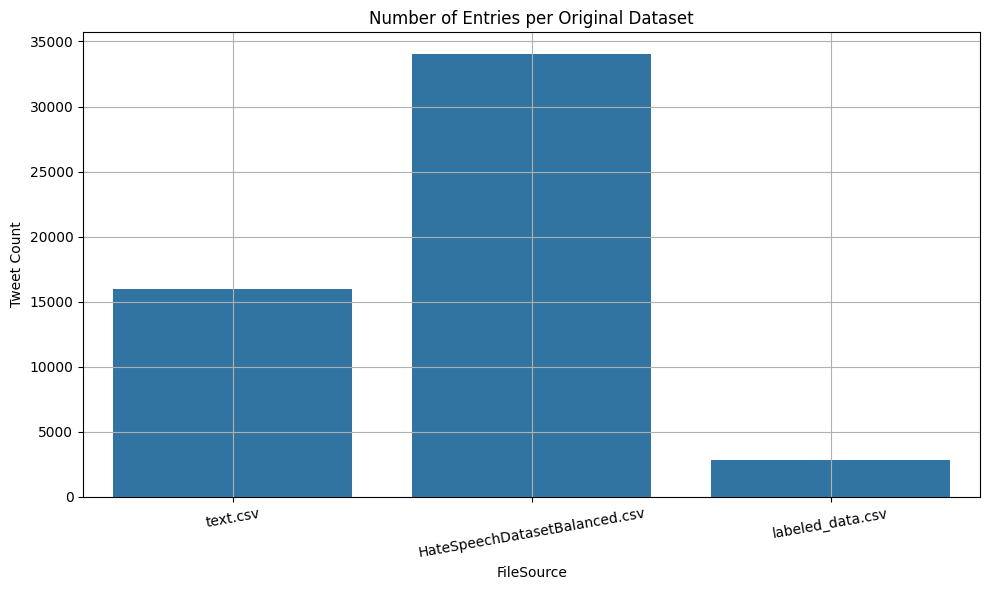

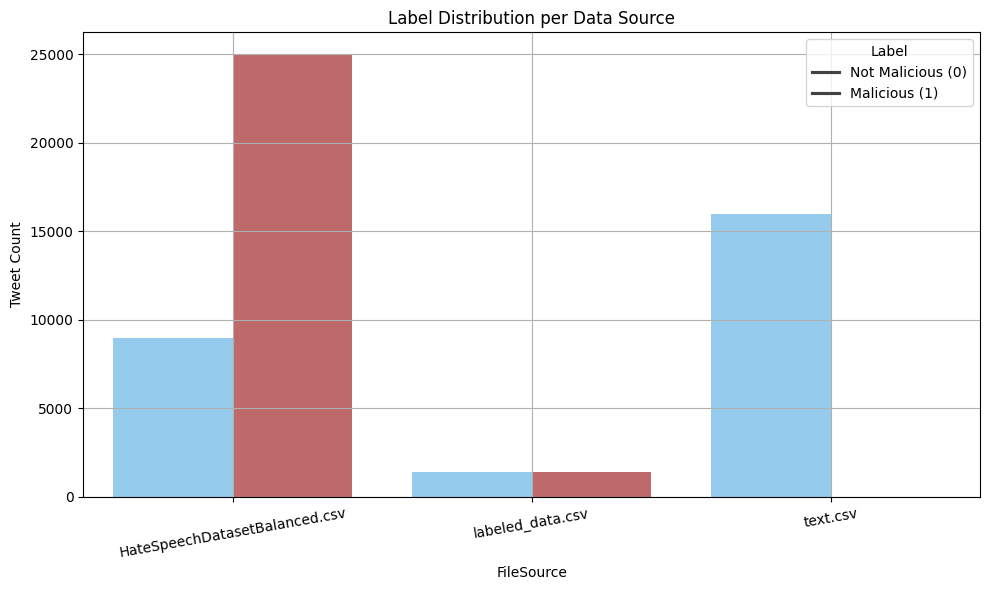

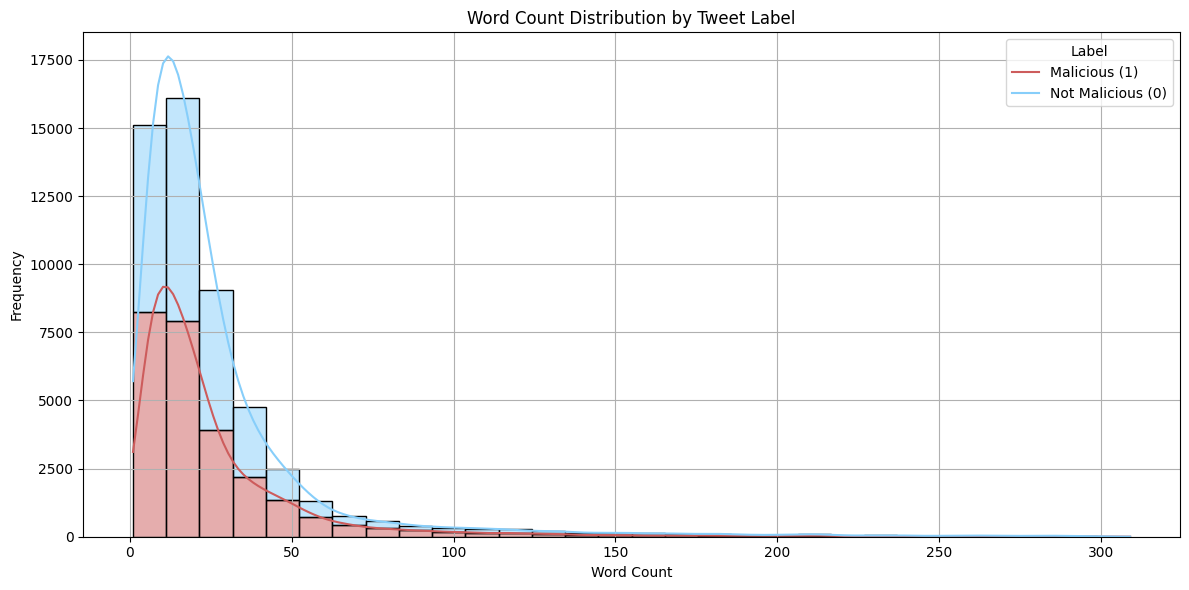

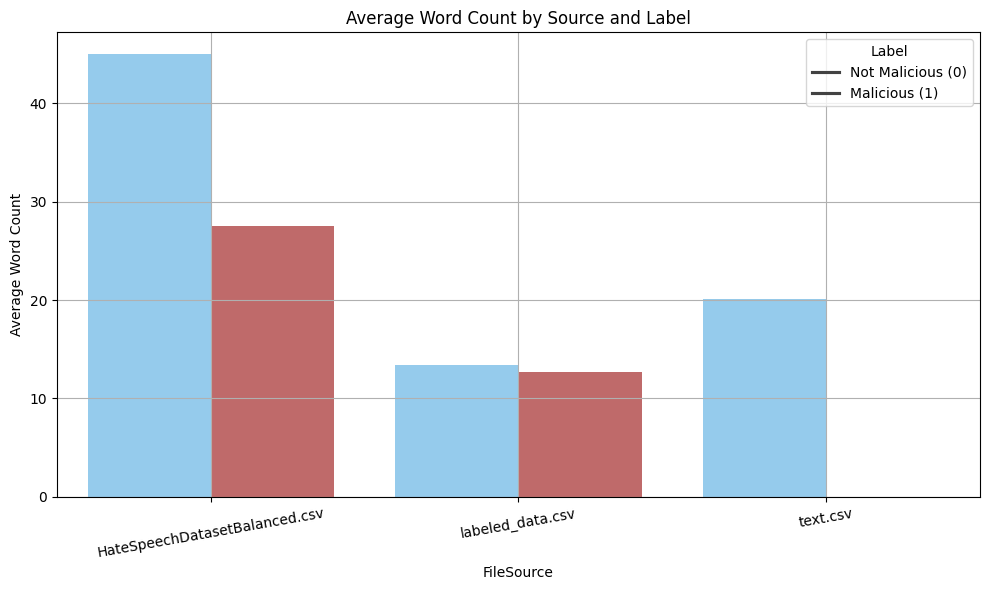

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("combined_balanced_dataset_BERT_abigailapp.csv")

# word count column
df['word_count'] = df['Content'].astype(str).apply(lambda x: len(x.split()))


custom_palette = {0: 'lightskyblue', 1: 'indianred'}

# bar chart of data source counts 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FileSource')
plt.title('Number of Entries per Original Dataset')
plt.ylabel('Tweet Count')
plt.xticks(rotation=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# bar chart that captures how the aggreggated csv is comprised of ratios of each csv file, for each label
source_label_counts = df.groupby(['FileSource', 'Label']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=source_label_counts, x='FileSource', y='Count', hue='Label', palette=custom_palette)
plt.title('Label Distribution per Data Source')
plt.ylabel('Tweet Count')
plt.xticks(rotation=10)
plt.legend(title='Label', labels=['Not Malicious (0)', 'Malicious (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

# word count distribution of malicious tweets vs. non malicious tweets
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='Label', bins=30, kde=True, multiple='stack', palette=custom_palette)
plt.title('Word Count Distribution by Tweet Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=[ 'Malicious (1)','Not Malicious (0)'])
plt.grid(True)
plt.tight_layout()
plt.show()

# avg word count per source and label 
avg_word_counts = df.groupby(['FileSource', 'Label'])['word_count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_word_counts, x='FileSource', y='word_count', hue='Label', palette=custom_palette)
plt.title('Average Word Count by Source and Label')
plt.ylabel('Average Word Count')
plt.xticks(rotation=10)
plt.legend(title='Label', labels=['Not Malicious (0)', 'Malicious (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()

# # pie chart for fun
# label_counts = df['Label'].value_counts()
# plt.figure(figsize=(6, 6))
# plt.pie(label_counts, labels=['Not Malicious (0)', 'Malicious (1)'],
#         autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
# plt.title('Malicious vs Non-Malicious Tweet Distribution')
# plt.tight_layout()
# plt.show()
